In [0]:
%matplotlib inline
from fastai.vision import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import os

In [2]:
colab = True
if colab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  %cp "/content/drive/My Drive/autoencoder-training/data.zip" .
  !unzip -q data.zip
  image_path = "data"
else: 
  os.chdir("../")
  image_path = os.getcwd() + "/data"

replace __MACOSX/data/._valid? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Cifar10 Classification
This notebook is going to test the accuracy of the pretrained resnet50 on the cifar10 dataset and how high an accuracy can be achieved by fine-tuning the model. This may be important when comparing the accuracy of the autoencoder at a later data.

Fastai will be used for this due to the ease of use of setting up a pretrained resnet50.

### Data Imports

In [0]:
data = ImageDataBunch.from_folder(image_path, size=32,ds_tfms=get_transforms(), bs = 128
                                 ).normalize(imagenet_stats)

In [7]:
len(data.train_ds), len(data.valid_ds)

(50000, 10000)

### Training

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.save("initial_learner") #save this so that this can be loaded with a smaller dataset instead of uploading with google colab each time

In [0]:
learn = learn.load('initial_learner')

In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.598870,1.402538,0.491300,01:37


In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-03
Min loss divided by 10: 6.31E-08


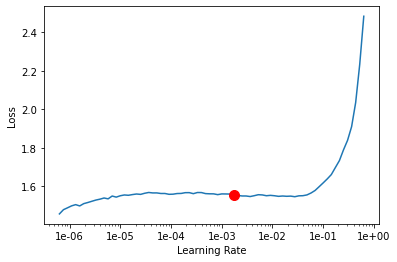

In [13]:
learn.recorder.plot(suggestion = True)

In [14]:
learn.fit_one_cycle(10, max_lr = 1.74E-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.398339,1.220175,0.433200,01:34
1,1.127568,0.977871,0.344400,01:35
2,0.942290,0.831256,0.290900,01:35
3,0.872018,0.805773,0.282200,01:36
4,0.805009,0.715660,0.251500,01:36
5,0.770156,0.689278,0.238200,01:35
6,0.735898,0.667947,0.236500,01:35
7,0.712517,0.658780,0.231800,01:35
8,0.703264,0.654656,0.226000,01:35
9,0.696983,0.656255,0.228800,01:36


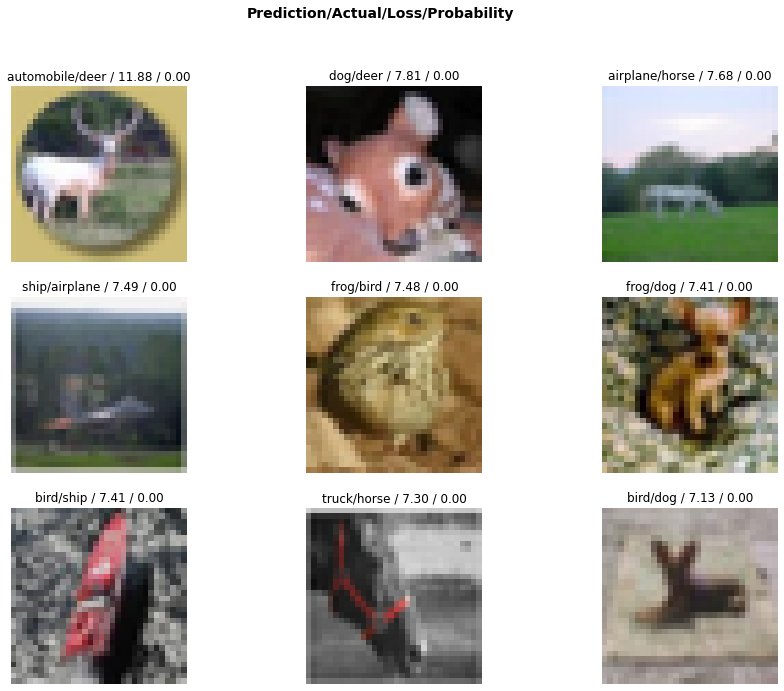

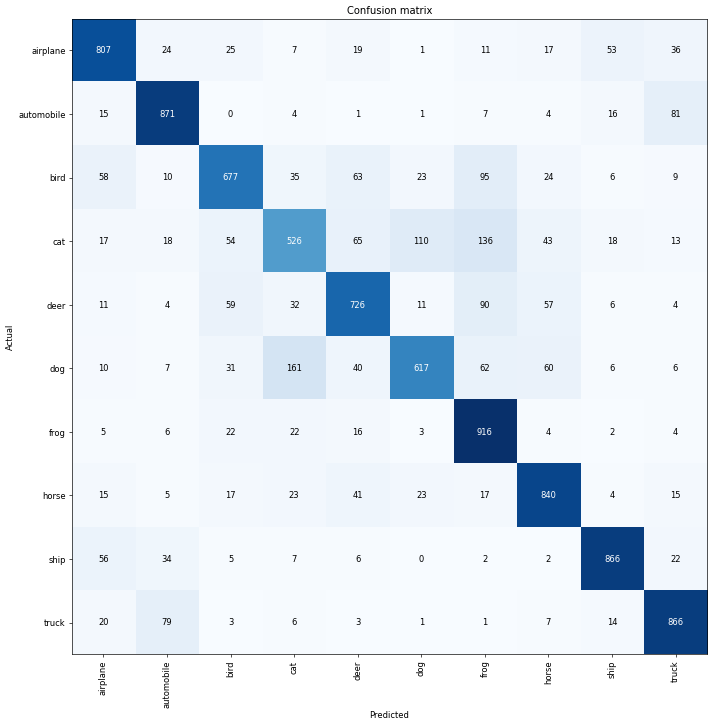

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr = slice(1e-06, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.676289,0.645269,0.223100,01:42
1,0.677055,0.621242,0.217300,01:41
2,0.662372,0.603337,0.212200,01:42
3,0.614215,0.590422,0.204000,01:41
4,0.583355,0.559134,0.192300,01:42
5,0.535916,0.548765,0.190300,01:41
6,0.499783,0.544007,0.188900,01:42
7,0.479993,0.527946,0.182100,01:42
8,0.470342,0.531451,0.183000,01:42
9,0.465873,0.534752,0.183700,01:42


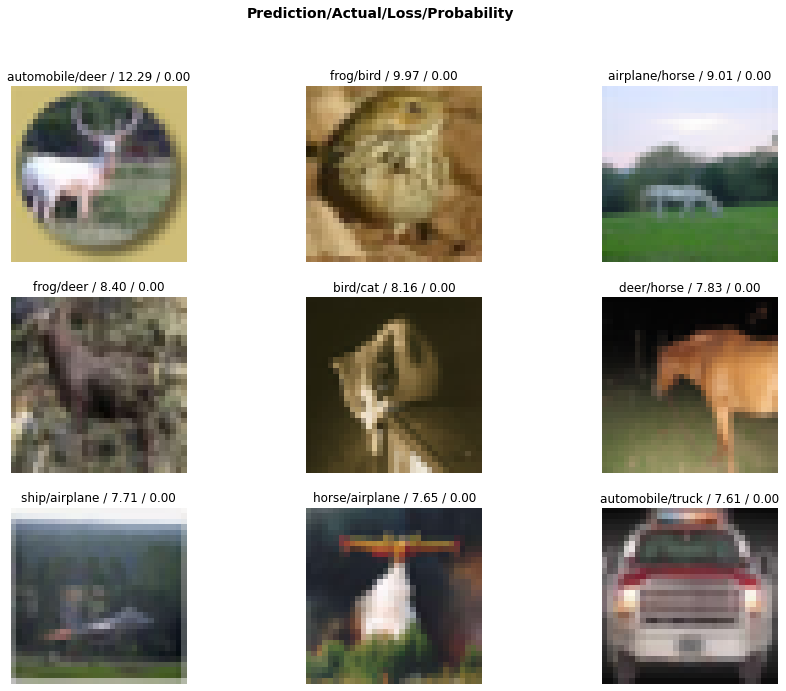

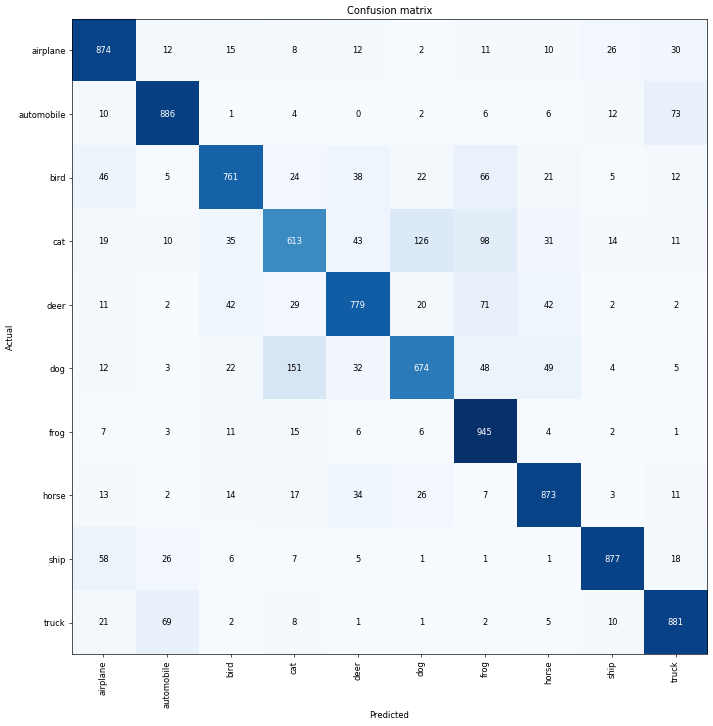

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)
#validation analysis
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)